# Featurization, Model Selection & Tuning Project

## Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

## Domain:
Cement manufacturing

## Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

## Learning Outcomes:
 Exploratory Data Analysis

 Building ML models for regression

 Hyper parameter tuning

## Objective:
Modeling of strength of high performance concrete using Machine Learning

# Steps and tasks:                                                                                                   

# Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load and review data

In [2]:
con_data = pd.read_csv("concrete.csv")  
print("The dimension of the data is: ",con_data.shape)
print("Quick preview of initial 10 rows of data:")
con_data.head(10)

The dimension of the data is:  (1030, 9)
Quick preview of initial 10 rows of data:


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# 1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)

## a. Univariate analysis (5 marks)
Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [3]:
#Illustrates the data type of every individual attribute
con_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

From above it can be seen that every data is numeric data. 

In [4]:
#Illustrates the basic information of every individual attribute
con_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


From above it can be seen that there are 8 attributes which has floating number whreas age showing number of days is integer type data the memory usage of data is 72.5 KB

In [5]:
#Illustrates the column names or attributes of the data
for col in con_data.columns: 
    print(col)

cement
slag
ash
water
superplastic
coarseagg
fineagg
age
strength


#### Attribute Information:
 Cement : measured in kg in a m3 mixture

 slag (blast furnace slag) : measured in kg in a m3 mixture

 ash (Fly ash) : measured in kg in a m3 mixture

 Water : measured in kg in a m3 mixture

 superplastic (Superplasticizer) : measured in kg in a m3 mixture

 coarseagg (Coarse Aggregate) : measured in kg in a m3 mixture

 fineagg (Fine Aggregate) : measured in kg in a m3 mixture

 Age : day (1~365)

 Concrete compressive strength measured in MPa

#### Dealing with Duplicates values

In [6]:
#check whether there is any duplicate rows or not
dupes = con_data.duplicated() 
print("Total no. of duplicate rows is:",sum(dupes))

Total no. of duplicate rows is: 25


from above it can be seen that there are 25 number of dupicate rows

In [7]:
con_data.drop_duplicates(keep='first',inplace = True) #keep the first occurence of row and eleiminate rest of the duplicate rows
dupes = con_data.duplicated() #again check whether there is any duplicate rows or not
print("Now Total no. of duplicate rows is:",sum(dupes))
print("Dimension of data after eliminating duplicate rows is:",con_data.shape)

Now Total no. of duplicate rows is: 0
Dimension of data after eliminating duplicate rows is: (1005, 9)


#### Dealing with incorrect or unwanted observations, tail of data

In [8]:
con_data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


From above it can be seen that there is no incorrect or unwanted data

#### Checking the dataset for missing values

In [9]:
con_data.isnull().values.any() ##check whether there is any missing value or not

False

From above it can be seen that there is no missing values in the dataset

In [10]:
#It gives the count of entries, mean, standard deviation and 5 point summary of each numeric columns.
con_data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


### (1) Analysis of target variable: Strength

In [11]:
print("Mean value of strength is:           ", con_data['strength'].mean())
print("Median of strength is:               ", con_data['strength'].median())
print("Standard deviation of strength is:   ", con_data['strength'].std())
print("Minimum value of strength is:        ", con_data['strength'].min())
print("Maximum value of strength is:        ", con_data['strength'].max())
print("Range of strength is:                ", (con_data['strength'].max()-con_data['strength'].min()))
print("1st quartile of strength is:         ", con_data['strength'].quantile(0.25))
print("3rd quartile of strength is:         ", con_data['strength'].quantile(0.75))

Mean value of strength is:            35.25037810945276
Median of strength is:                33.8
Standard deviation of strength is:    16.284815369229044
Minimum value of strength is:         2.33
Maximum value of strength is:         82.6
Range of strength is:                 80.27
1st quartile of strength is:          23.52
3rd quartile of strength is:          44.87


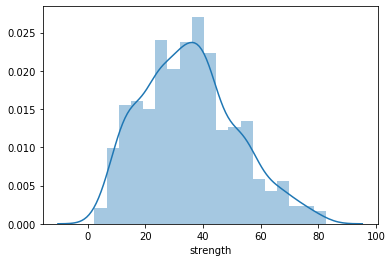

In [12]:
sns.distplot(con_data['strength']) #Body distribution of strength

Fromabove it is seen that 'strength' attribute is almost normally distributed and it is sightly positively skewed

### (2) Analysis of cement: 

In [13]:
print("Mean value of cement  is:           ", con_data['cement'].mean())
print("Median of cement  is:               ", con_data['cement'].median())
print("Standard deviation of cement  is:   ", con_data['cement'].std())
print("Minimum value of cement  is:        ", con_data['cement'].min())
print("Maximum value of cement  is:        ", con_data['cement'].max())
print("Range of cement  is:                ", (con_data['cement'].max()-con_data['cement'].min()))
print("1st quartile of cement  is:         ", con_data['cement'].quantile(0.25))
print("3rd quartile of cement  is:         ", con_data['cement'].quantile(0.75))

Mean value of cement  is:            278.631343283582
Median of cement  is:                265.0
Standard deviation of cement  is:    104.34426071285247
Minimum value of cement  is:         102.0
Maximum value of cement  is:         540.0
Range of cement  is:                 438.0
1st quartile of cement  is:          190.7
3rd quartile of cement  is:          349.0


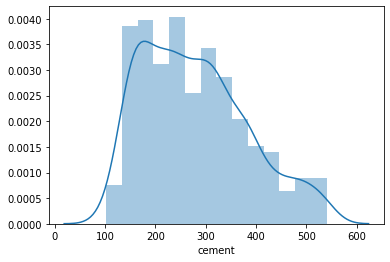

In [14]:
sns.distplot(con_data['cement']) #Body distribution of cement

From above it is seen that 'cement' attribute is almost normally distributed and it is sightly positively skewed

### (3) Analysis of slag:

In [15]:
print("Mean value of slag  is:           ", con_data['slag'].mean())
print("Median of slag  is:               ", con_data['slag'].median())
print("Standard deviation of slag  is:   ", con_data['slag'].std())
print("Minimum value of slag  is:        ", con_data['slag'].min())
print("Maximum value of slag  is:        ", con_data['slag'].max())
print("Range of slag  is:                ", (con_data['slag'].max()-con_data['slag'].min()))
print("1st quartile of slag  is:         ", con_data['slag'].quantile(0.25))
print("3rd quartile of slag  is:         ", con_data['slag'].quantile(0.75))

Mean value of slag  is:            72.04348258706466
Median of slag  is:                20.0
Standard deviation of slag  is:    86.17080699343262
Minimum value of slag  is:         0.0
Maximum value of slag  is:         359.4
Range of slag  is:                 359.4
1st quartile of slag  is:          0.0
3rd quartile of slag  is:          142.5


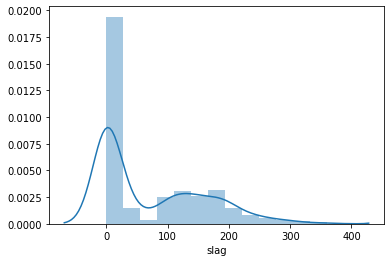

In [16]:
sns.distplot(con_data['slag']) #Body distribution of slag

From above it is seen that 'slag' attribute is the mix of two gausssians and it is positively skewed.The right tail in it shows the presence of outliers.

### (4) Analysis of ash:

In [17]:
print("Mean value of ash  is:           ", con_data['ash'].mean())
print("Median of ash  is:               ", con_data['ash'].median())
print("Standard deviation of ash  is:   ", con_data['ash'].std())
print("Minimum value of ash  is:        ", con_data['ash'].min())
print("Maximum value of ash  is:        ", con_data['ash'].max())
print("Range of ash  is:                ", (con_data['ash'].max()-con_data['ash'].min()))
print("1st quartile of ash  is:         ", con_data['ash'].quantile(0.25))
print("3rd quartile of ash  is:         ", con_data['ash'].quantile(0.75))

Mean value of ash  is:            55.53631840796018
Median of ash  is:                0.0
Standard deviation of ash  is:    64.20796859777033
Minimum value of ash  is:         0.0
Maximum value of ash  is:         200.1
Range of ash  is:                 200.1
1st quartile of ash  is:          0.0
3rd quartile of ash  is:          118.3


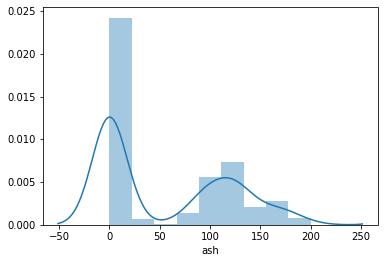

In [18]:
sns.distplot(con_data['ash']) #Body distribution of ash

From above it is seen that 'ash' attribute is the mix of two gausssians and it is slightly positively skewed.The right tail in it shows the presence of outliers.

### (5) Analysis of water: 

In [19]:
print("Mean value of water  is:           ", con_data['water'].mean())
print("Median of water  is:               ", con_data['water'].median())
print("Standard deviation of water  is:   ", con_data['water'].std())
print("Minimum value of water  is:        ", con_data['water'].min())
print("Maximum value of water  is:        ", con_data['water'].max())
print("Range of water  is:                ", (con_data['water'].max()-con_data['water'].min()))
print("1st quartile of water  is:         ", con_data['water'].quantile(0.25))
print("3rd quartile of water  is:         ", con_data['water'].quantile(0.75))

Mean value of water  is:            182.07532338308457
Median of water  is:                185.7
Standard deviation of water  is:    21.339334087611324
Minimum value of water  is:         121.8
Maximum value of water  is:         247.0
Range of water  is:                 125.2
1st quartile of water  is:          166.6
3rd quartile of water  is:          192.9


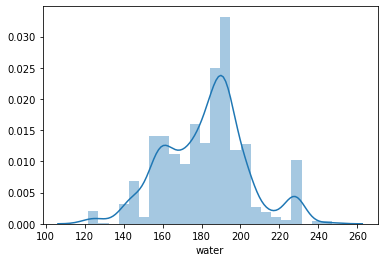

In [20]:
sns.distplot(con_data['water']) #Body distribution of water

From above it is seen that 'water' attribute is the mix of three gausssians and it is slightly negatively skewed.The left tail in it shows the presence of outliers.

### (6) Analysis of superplastic:

In [21]:
print("Mean value of superplastic  is:           ", con_data['superplastic'].mean())
print("Median of superplastic  is:               ", con_data['superplastic'].median())
print("Standard deviation of superplastic  is:   ", con_data['superplastic'].std())
print("Minimum value of superplastic  is:        ", con_data['superplastic'].min())
print("Maximum value of superplastic  is:        ", con_data['superplastic'].max())
print("Range of superplastic  is:                ", (con_data['superplastic'].max()-con_data['superplastic'].min()))
print("1st quartile of superplastic  is:         ", con_data['superplastic'].quantile(0.25))
print("3rd quartile of superplastic  is:         ", con_data['superplastic'].quantile(0.75))

Mean value of superplastic  is:            6.033233830845768
Median of superplastic  is:                6.1
Standard deviation of superplastic  is:    5.9199667200234325
Minimum value of superplastic  is:         0.0
Maximum value of superplastic  is:         32.2
Range of superplastic  is:                 32.2
1st quartile of superplastic  is:          0.0
3rd quartile of superplastic  is:          10.0


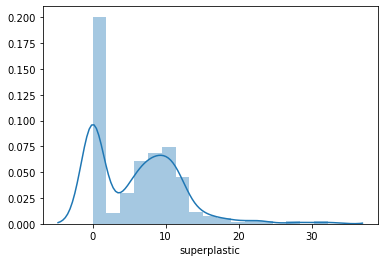

In [22]:
sns.distplot(con_data['superplastic']) #Body distribution of superplastic

From above it is seen that 'superplastic' attribute is the mix of two gausssians and it is slightly positively skewed.The right tail in it shows the presence of outliers.

### (7) Analysis of coarseagg: 

In [23]:
print("Mean value of coarseagg  is:           ", con_data['coarseagg'].mean())
print("Median of coarseagg  is:               ", con_data['coarseagg'].median())
print("Standard deviation of coarseagg  is:   ", con_data['coarseagg'].std())
print("Minimum value of coarseagg  is:        ", con_data['coarseagg'].min())
print("Maximum value of coarseagg  is:        ", con_data['coarseagg'].max())
print("Range of coarseagg  is:                ", (con_data['coarseagg'].max()-con_data['coarseagg'].min()))
print("1st quartile of coarseagg  is:         ", con_data['coarseagg'].quantile(0.25))
print("3rd quartile of coarseagg  is:         ", con_data['coarseagg'].quantile(0.75))

Mean value of coarseagg  is:            974.3768159203987
Median of coarseagg  is:                968.0
Standard deviation of coarseagg  is:    77.57966673714671
Minimum value of coarseagg  is:         801.0
Maximum value of coarseagg  is:         1145.0
Range of coarseagg  is:                 344.0
1st quartile of coarseagg  is:          932.0
3rd quartile of coarseagg  is:          1031.0


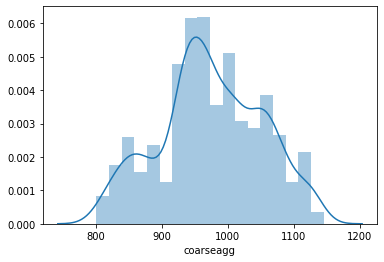

In [24]:
sns.distplot(con_data['coarseagg']) #Body distribution of coarseagg

From above it is seen that 'coarseagg' attribute is the mix of three gausssians and it is almost normally distributed.

### (8) Analysis of fineagg: 

In [25]:
print("Mean value of fineagg  is:           ", con_data['fineagg'].mean())
print("Median of fineagg  is:               ", con_data['fineagg'].median())
print("Standard deviation of fineagg  is:   ", con_data['fineagg'].std())
print("Minimum value of fineagg  is:        ", con_data['fineagg'].min())
print("Maximum value of fineagg  is:        ", con_data['fineagg'].max())
print("Range of fineagg  is:                ", (con_data['fineagg'].max()-con_data['fineagg'].min()))
print("1st quartile of fineagg  is:         ", con_data['fineagg'].quantile(0.25))
print("3rd quartile of fineagg  is:         ", con_data['fineagg'].quantile(0.75))

Mean value of fineagg  is:            772.6882587064675
Median of fineagg  is:                780.0
Standard deviation of fineagg  is:    80.34043464964547
Minimum value of fineagg  is:         594.0
Maximum value of fineagg  is:         992.6
Range of fineagg  is:                 398.6
1st quartile of fineagg  is:          724.3
3rd quartile of fineagg  is:          822.2


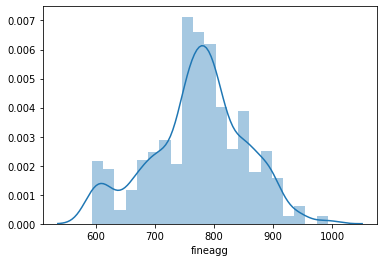

In [26]:
sns.distplot(con_data['fineagg']) #Body distribution of fineagg

From above it is seen that 'fineagg' attribute is the mix of two gausssians and it is almost normally distributed.

### (9) Analysis of age:

In [27]:
print("Mean value of age  is:           ", con_data['age'].mean())
print("Median of age  is:               ", con_data['age'].median())
print("Standard deviation of age  is:   ", con_data['age'].std())
print("Minimum value of age  is:        ", con_data['age'].min())
print("Maximum value of age  is:        ", con_data['age'].max())
print("Range of age  is:                ", (con_data['age'].max()-con_data['age'].min()))
print("1st quartile of age  is:         ", con_data['age'].quantile(0.25))
print("3rd quartile of age  is:         ", con_data['age'].quantile(0.75))

Mean value of age  is:            45.85671641791045
Median of age  is:                28.0
Standard deviation of age  is:    63.734691679416535
Minimum value of age  is:         1
Maximum value of age  is:         365
Range of age  is:                 364
1st quartile of age  is:          7.0
3rd quartile of age  is:          56.0


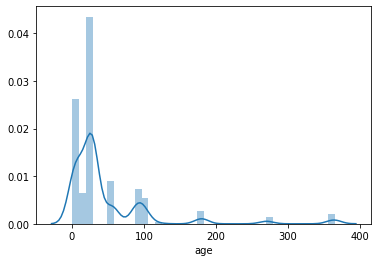

In [28]:
sns.distplot(con_data['age']) #Body distribution of age

From above it is seen that 'age' attribute is the mix of five gausssians and it is positively skewed.The right tail in it shows the presence of outliers.

## b. Multivariate analysis (5 marks)
Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

#### Boxplot

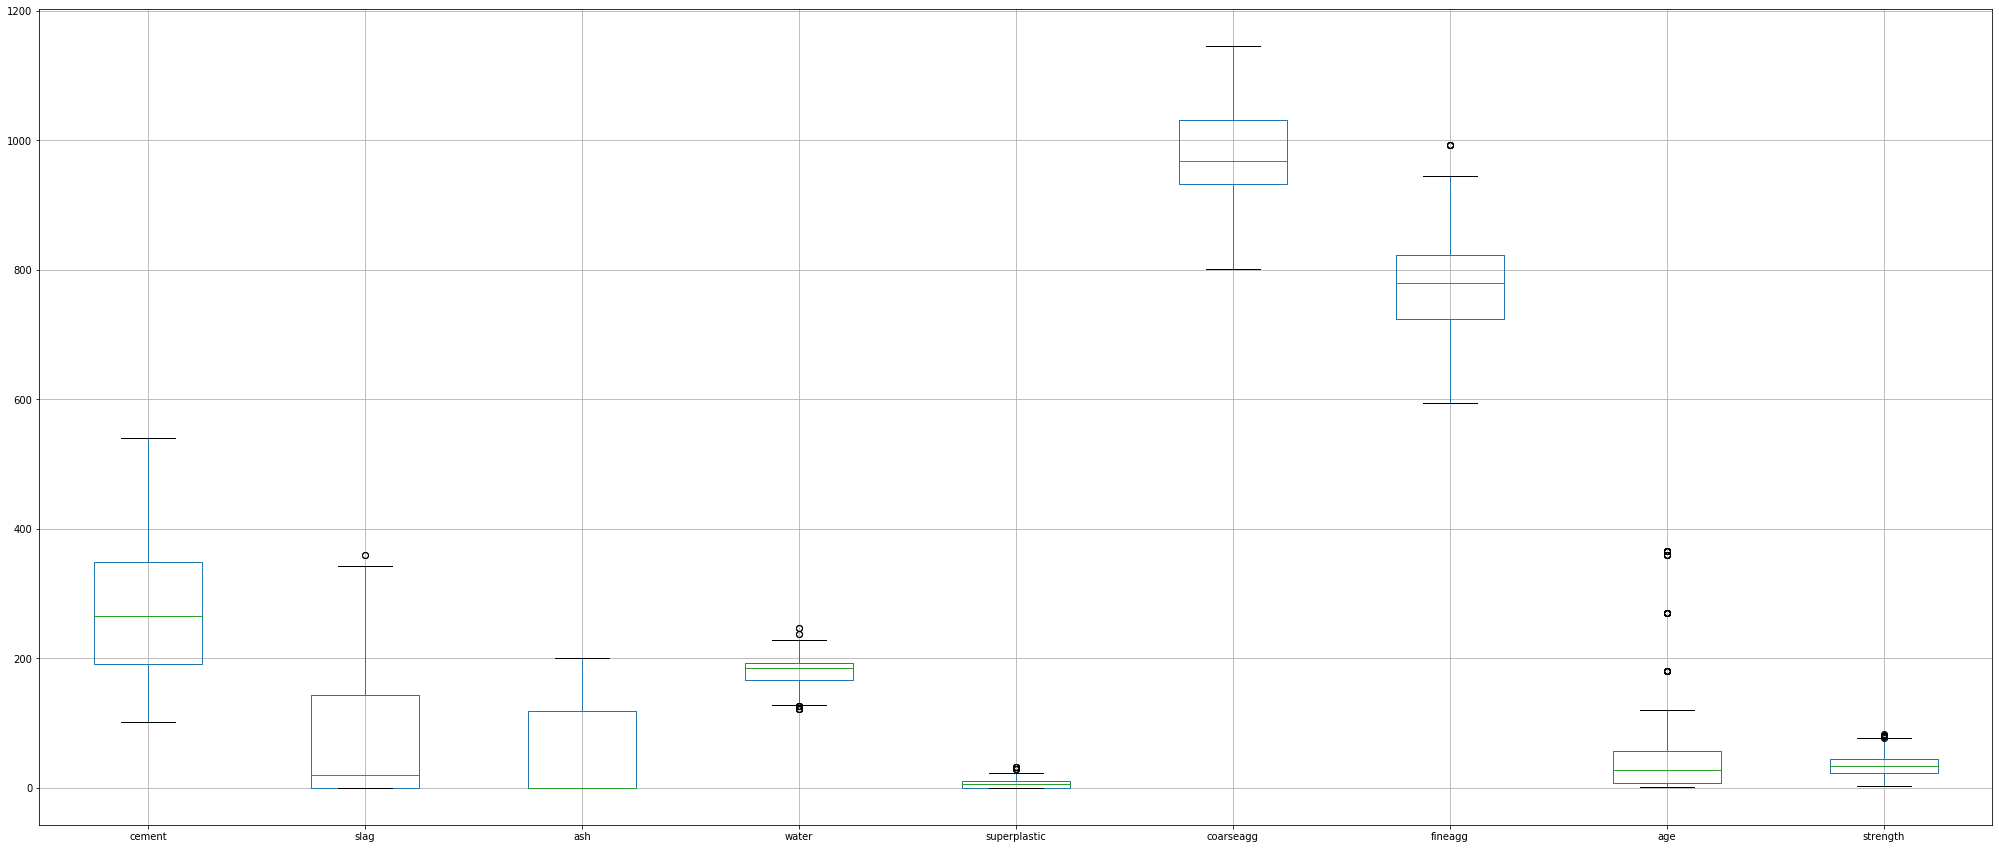

In [29]:
#Boxplot of every attributes:
con_data.boxplot(figsize=(35,15))

From above it is seen that slag, superplastic, fineagg, age and strength has some upper outliers whereas water has both upper and lower outliers.

#### Pairplot

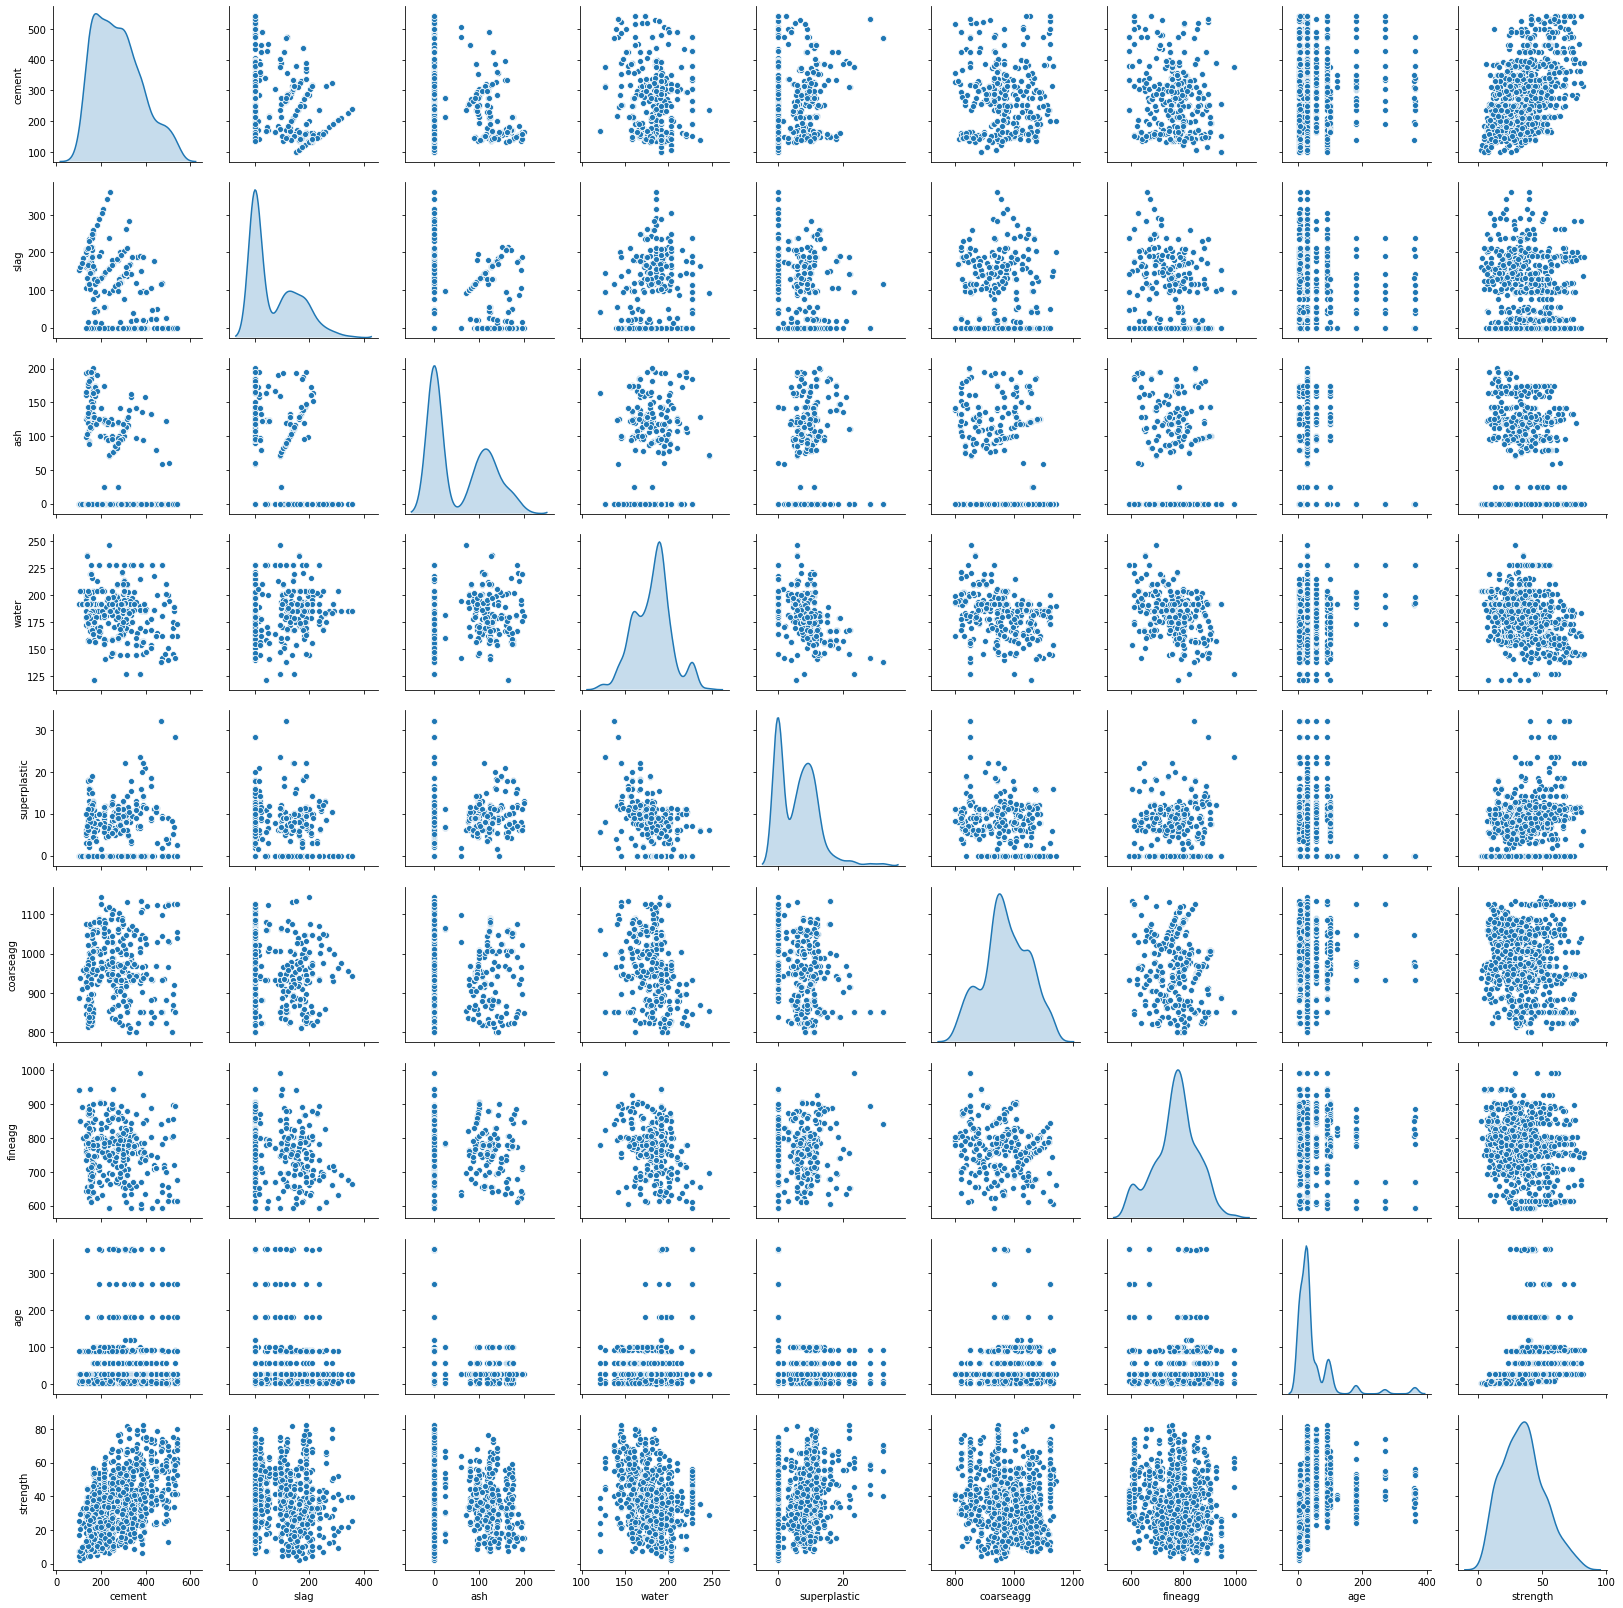

In [30]:
sns.pairplot(con_data, diag_kind='kde') #Pairplot between every attributes of data

#### histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001875A67D688>,
      dtype=object)

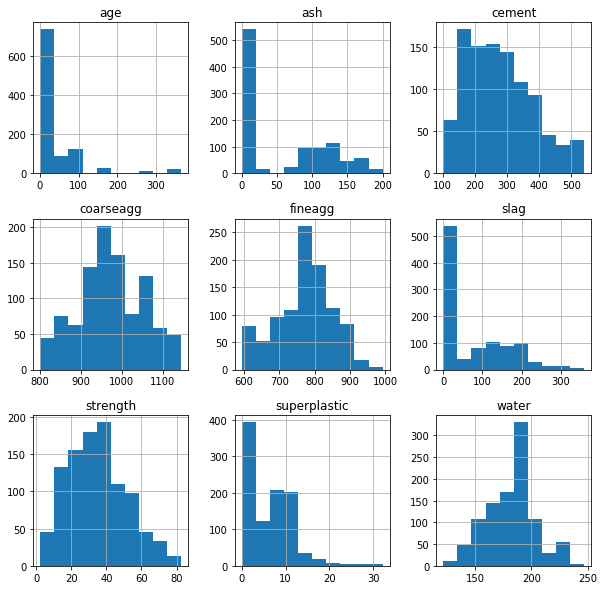

In [31]:
con_data.hist(figsize=(10,10))

#### Heatmap

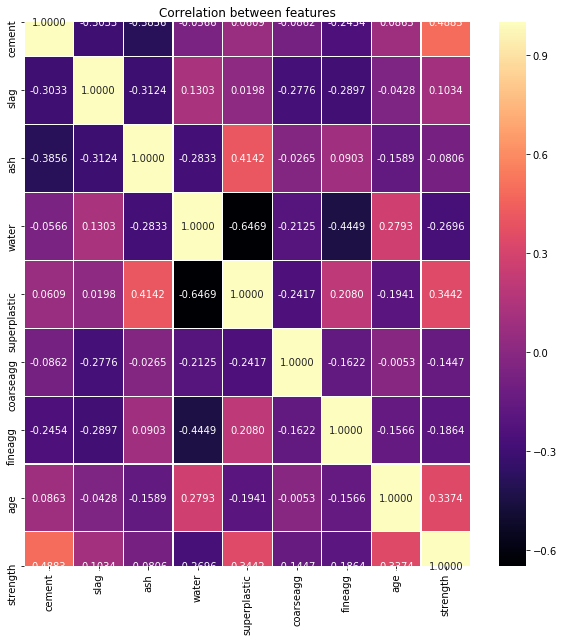

In [32]:
#plots Heatmap For visualization of the correlation among every attributes

fig,ax = plt.subplots(figsize=(10,10))   
sns.heatmap(con_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.4f',cmap="magma")
plt.title('Correlation between features')
plt.show() # the color intensity is based on correlation facror

In [33]:
#Correlation among different attributes
con_data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

#### Relation among independent attributes:

1. cement does not have strong relation with any other attribute, with slag it is distributed as three clusters as seen from pairplot where it has three lines, it is almost spread like cloud with every other independent attributes.

2. slag is distributed as three clusters with cement and ash, it also does not have any strong relation and spreads like cloud with any other independent attributes.

3. ash has slight positive correlation with superplastic (0.414213) and apart from this, it does not have any strong relation and spreads like cloud with any other independent attributes.

4. water has slight negative relation with superplastic (-0.646946) and fineagg (-0.444915) and with other attributes it does not have any significant relation and it spreads like cloud with other independent attributes.

5. superplastic has negative relation with water and does not have any significant relation with any other independent attributes.

6. coarseagg has no significant relation with any independent attributes and spreads like cloud.

7. fineagg has slight negative relation with waterand does not have any significant relation with any other independent attributes.

8. age does not have any significant relation with any other independent attributes and it is spread like cloud.

#### Relationship between dependent attribute (strenght) and independent attributes

1. cement is positively related to strength but relation is not strong linear rather it is scattered in both the dimensions and hence it is not a good predictor of strenght.

2. slag is weakly related to strength hence it is poor predictor of strength.

3. ash has the weakest relation among all independent attribtes with strenght (-0.080648) hence it is the poorest predictor. It can be dropped but as number of independent attributes in the data (8) is already low so keepnig and dropping of attribute can be decided in further step of feature engineering.

4. water is weakly related to strength hence it is poor predictor of strength.

5. superplastic is weakly related to strength hence it is poor predictor of strength.

6. coarseagg is weakly related to strength hence it is poor predictor of strength.

7. fineagg is weakly related to strength hence it is poor predictor of strength.

8. age is weakly related to strength hence it is poor predictor of strength.
 
From above it can be seen that strength is not strongly related to any independent attribute hence we should take higher order composite attribute for better modelling instead of simple linear model.

In [34]:
# Check for highly correlated attributes
cor= con_data.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.9) | (cor< -0.9)]

Series([], dtype: float64)

From above it is seen that there are no attributes which are strongly related so we cannot drop any attribute.

## c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)

### Checking for missing value

In [35]:
con_data.isnull().sum().sum() #It will print the total no. missing values in whole data of concrete

0

From above it can be seen that data does not have any missing value.

### Dealing with outliers

In [36]:
#Normalized data falling out of 3 standard deviation from mean is treated as outlier 3 standard covers almost 99% of curve.

#code to print number of outliers in every attribute
for col_name in con_data.columns:
    mean = con_data[col_name].mean() #mean of the attribute
    std = con_data[col_name].std()   #standard deviation of the attribute
    norm = (con_data[col_name ]- mean)/std  #normalizing data of attribute
    magnitude_norm=norm.abs()               # taking absolute value of normalized data, negative value is converted to positive
    count = con_data.loc[(magnitude_norm >3),col_name].count() #count number of outiers
    print("The number of outliers in",col_name,"is:",count)
    con_data.loc[(magnitude_norm >3),col_name]=np.nan #replace outliers with nan

The number of outliers in cement is: 0
The number of outliers in slag is: 4
The number of outliers in ash is: 0
The number of outliers in water is: 2
The number of outliers in superplastic is: 10
The number of outliers in coarseagg is: 0
The number of outliers in fineagg is: 0
The number of outliers in age is: 33
The number of outliers in strength is: 0


### Filling outlier with KNN Imputer

In [37]:
#Each sample’s outliers are imputed using the mean value from n_neighbors nearest neighbors found in the dataset.
#here 2 nearest neighbors are chosen for imputation

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
# knn imputer produces a numpy array so we have to transform it to dataframe.h
con_data_fill = pd.DataFrame(imputer.fit_transform(con_data),columns=con_data.columns)

In [38]:
con_data_fill.isnull().values.any() #check whether there is any missing value remain in imputed data or not

False

From above it is seen that all the nan values are filled with mean of 2 nearest neighbors.

In [39]:
#code to print number of outliers in filled data to check for every attribute
for col_name in con_data_fill.columns:
    mean = con_data_fill[col_name].mean() #mean of the attribute
    std = con_data_fill[col_name].std()   #standard deviation of the attribute
    norm = (con_data_fill[col_name ]- mean)/std  #normalizing data of attribute
    magnitude_norm=norm.abs()               # taking absolute value of normalized data, negative value is converted to positive
    count = con_data_fill.loc[(magnitude_norm >3),col_name].count() #count number of outiers
    print("The number of outliers in",col_name,"of imputed data is:",count)

The number of outliers in cement of imputed data is: 0
The number of outliers in slag of imputed data is: 0
The number of outliers in ash of imputed data is: 0
The number of outliers in water of imputed data is: 0
The number of outliers in superplastic of imputed data is: 5
The number of outliers in coarseagg of imputed data is: 0
The number of outliers in fineagg of imputed data is: 0
The number of outliers in age of imputed data is: 26
The number of outliers in strength of imputed data is: 0


From above it is seen that still there are some outliers in superplastic and age, it occurs because after imputing the outliers, the standard deviation goes down and hence again some data falls out of 3 standard deviation range.

We can go for another iteration but here we can stop for simplicity of code.

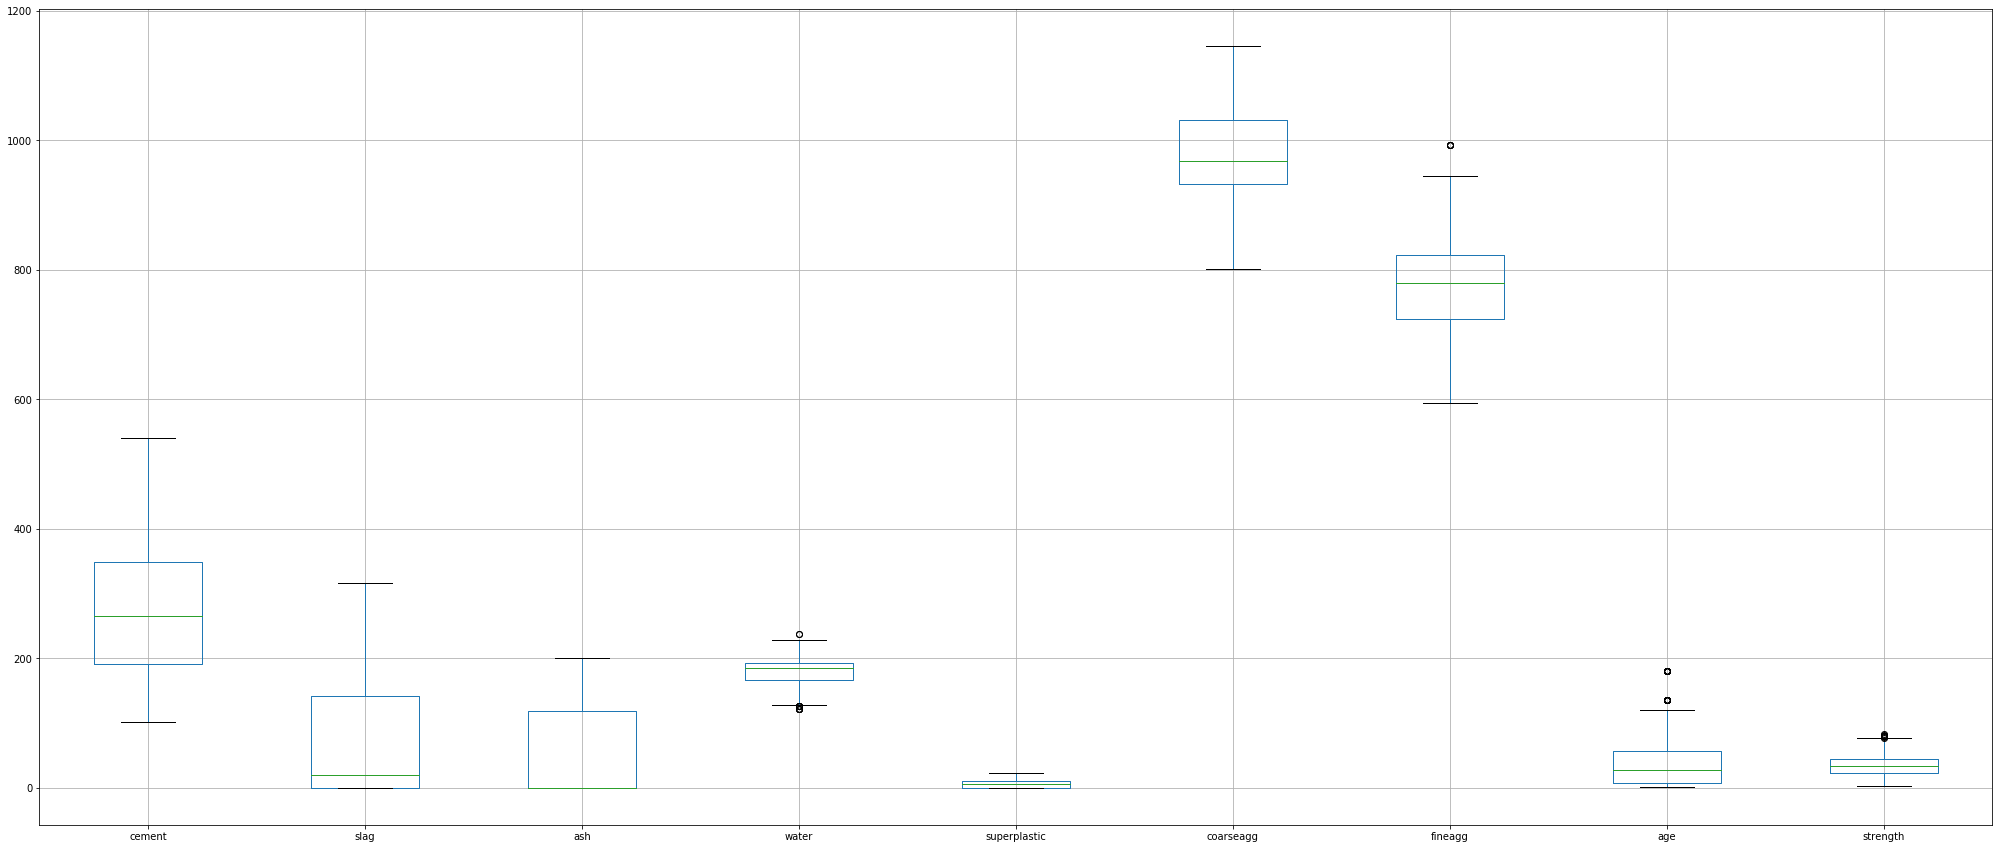

In [40]:
# Show Boxplot after dealing with outliers of every attributes to check the status of outliers:
con_data_fill.boxplot(figsize=(35,15))

From above it is seen that number of outliers has reduced

# 2. Deliverable -2 (Feature Engineering techniques) (15 marks)

## a. Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks) 

### Model analysis on first order (linear) parameters of attributes

#### Separate dependent and independent variables

In [41]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = con_data_fill.drop('strength', axis=1) 

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = con_data_fill[['strength']]

#### Fix the random seed

In [42]:
Rand_seed = 60

#### Split data in train and test in ratio of 70:30

In [43]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.30, random_state=Rand_seed)
print("The dimension of training set of independent attribute is: {} and dependent attribute is: {}".format(X1_train.shape, y1_train.shape))
print("The dimension of testing set of independent attribute is: {} and dependent attribute is: {}".format(X1_test.shape, y1_test.shape))

The dimension of training set of independent attribute is: (703, 8) and dependent attribute is: (703, 1)
The dimension of testing set of independent attribute is: (302, 8) and dependent attribute is: (302, 1)


#### Scale the data before fitting into model

In [44]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler

# fit and transform the scaling on training and testing data separately to avoid data leakage

# fit StandardScaler on training raw data indepndent column
X1stand = StandardScaler().fit(X1_train)
    
# transform the training raw data indepndent column
X1_train_scaled = X1stand.transform(X1_train)
    
# transform the testing raw data indepndent column
X1_test_scaled = X1stand.transform(X1_test)

# fit StandardScaler on training raw data depndent column
y1stand = StandardScaler().fit(y1_train)
    
# transform the training raw data depndent column
y1_train_scaled = y1stand.transform(y1_train)
    
# transform the testing raw data depndent column
y1_test_scaled = y1stand.transform(y1_test)

### Fit a simple linear model on 1st order feature and show their coefficient

In [45]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(X1_train_scaled, y1_train_scaled)

for idx, col_name in enumerate(X1_train.columns):
    print("The Linear regression coefficient on 1st order feature for {} is {}".format(col_name, lin_reg_model1.coef_[0][idx]))

The Linear regression coefficient on 1st order feature for cement is 0.6667966198004597
The Linear regression coefficient on 1st order feature for slag is 0.4379278291960038
The Linear regression coefficient on 1st order feature for ash is 0.2821516791420597
The Linear regression coefficient on 1st order feature for water is -0.2518470636640573
The Linear regression coefficient on 1st order feature for superplastic is 0.1346253646166836
The Linear regression coefficient on 1st order feature for coarseagg is 0.012197198974506189
The Linear regression coefficient on 1st order feature for fineagg is 0.022494728367139633
The Linear regression coefficient on 1st order feature for age is 0.5271978520306897


In [46]:
intercept1 = lin_reg_model1.intercept_[0]

print("The intercept for Linear regression on 1st order feature is {}".format(intercept1))

The intercept for Linear regression on 1st order feature is 1.1890738872038702e-17


### Create a regularized RIDGE model on 1st order feature and show their coefficients

In [47]:
# Import Ridge Regression machine learning library
from sklearn.linear_model import Ridge

ridge1 = Ridge(alpha=.3) # set learning constant alpha=0.3
ridge1.fit(X1_train_scaled, y1_train_scaled)

for idx, col_name in enumerate(X1_train.columns):
    print("The Ridge regression coefficient on 1st order parameter for {} is {}".format(col_name, ridge1.coef_[0][idx]))

The Ridge regression coefficient on 1st order parameter for cement is 0.6632664836815318
The Ridge regression coefficient on 1st order parameter for slag is 0.4345331320224968
The Ridge regression coefficient on 1st order parameter for ash is 0.279080295814836
The Ridge regression coefficient on 1st order parameter for water is -0.25398759739062543
The Ridge regression coefficient on 1st order parameter for superplastic is 0.13481825602463182
The Ridge regression coefficient on 1st order parameter for coarseagg is 0.009895029476886263
The Ridge regression coefficient on 1st order parameter for fineagg is 0.01959459339921685
The Ridge regression coefficient on 1st order parameter for age is 0.5268389746693112


### Create a regularized LASSO model on 1st order feature and show their coefficients

In [48]:
# Import Lasso Regression machine learning library
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X1_train_scaled, y1_train_scaled)

for idx, col_name in enumerate(X1_train.columns):
    print("The Lasso regression coefficient on 1st order feature for {} is {}".format(col_name, lasso1.coef_[idx]))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

The Lasso regression coefficient on 1st order feature for cement is 0.37248618400347927
The Lasso regression coefficient on 1st order feature for slag is 0.12002743284794923
The Lasso regression coefficient on 1st order feature for ash is 0.0
The Lasso regression coefficient on 1st order feature for water is -0.1150784321465897
The Lasso regression coefficient on 1st order feature for superplastic is 0.25037174838455856
The Lasso regression coefficient on 1st order feature for coarseagg is -0.0
The Lasso regression coefficient on 1st order feature for fineagg is -0.0
The Lasso regression coefficient on 1st order feature for age is 0.377414495990838


### Comparison of linear, ridge and lasso regression coefficient on 1st order features

In [49]:
a = pd.DataFrame(lin_reg_model1.coef_.transpose(), columns= ['lin_reg_coef1'])
b = pd.DataFrame(ridge1.coef_.transpose(), columns= ['Ridge1_coef'])
c = pd.DataFrame(lasso1.coef_.transpose(), columns= ['Lasso1 _coef'])
d = (a.join(b)).join(c)
coef_comp_table = d.set_index(X1_train.columns)
print("coefficient comparision table on first order features:")
coef_comp_table

coefficient comparision table on first order features:


,lin_reg_coef1,Ridge1_coef,Lasso1 _coef
cement,0.666797,0.663266,0.372486
slag,0.437928,0.434533,0.120027
ash,0.282152,0.279080,0.000000
water,-0.251847,-0.253988,-0.115078
superplastic,0.134625,0.134818,0.250372
coarseagg,0.012197,0.009895,-0.000000
fineagg,0.022495,0.019595,-0.000000
age,0.527198,0.526839,0.377414


In [50]:
# Check no. of zero and non-zero lasso coefficient on first order feature
q = pd.DataFrame(lasso1.coef_).replace(0, np.NaN)
zero_lasso1_coef = q.isnull().sum().sum()
non_zero_lasso1_coef = len(X.columns) - zero_lasso1_coef
print("Total no. of zero lasso coefficient on first order feature is: ",zero_lasso1_coef)
print("Total no. of non-zero lasso coefficient on first order feature is: ",non_zero_lasso1_coef)

Total no. of zero lasso coefficient on first order feature is:  3
Total no. of non-zero lasso coefficient on first order feature is:  5


From above it is seen that:

1. The linear regression coefficient and regularized ridge regression coefficients are almost similar as it is the first order feature.

2. Ridge regression has coefficient does not have any coefficient = 0 which means it does not give any chance to drop any feature.

3. Lasso regression has smaller variation in its oefficient also it has 3 zero coefficient among 8 feature which are dropped.

### Comparing accuracy and k-fold scores of linear, ridge and lasso regression coefficient on 1st order features

In [51]:
import math
from sklearn import model_selection
kfold_CV = model_selection.KFold(n_splits=10, random_state=Rand_seed)

# K-fold cross validation score of LinearRegression on first order features
r2_lin_reg1 = model_selection.cross_val_score(lin_reg_model1, X, y, cv=kfold_CV, scoring='r2').mean()
MSE_lin_reg1 = model_selection.cross_val_score(lin_reg_model1, X, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_lin_reg1 = math.sqrt(np.absolute(MSE_lin_reg1))
MAE_lin_reg1 = model_selection.cross_val_score(lin_reg_model1, X, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

# K-fold cross validation score of Ridge Regression on first order features
r2_ridge1 = model_selection.cross_val_score(ridge1, X, y, cv=kfold_CV, scoring='r2').mean()
MSE_ridge1 = model_selection.cross_val_score(ridge1, X, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_ridge1 = math.sqrt(np.absolute(MSE_ridge1))
MAE_ridge1 = model_selection.cross_val_score(ridge1, X, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

# K-fold cross validation score of Lasso Regression on first order features
r2_lasso1 = model_selection.cross_val_score(lasso1, X, y, cv=kfold_CV, scoring='r2').mean()
MSE_lasso1 = model_selection.cross_val_score(lasso1, X, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_lasso1 = math.sqrt(np.absolute(MSE_lasso1))
MAE_lasso1 = model_selection.cross_val_score(lasso1, X, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

In [52]:
# Performance accuracy of linear regression on train:test (70:30) on first order feature
lin_reg1_train = lin_reg_model1.score(X1_train_scaled, y1_train_scaled)
lin_reg1_test = lin_reg_model1.score(X1_test_scaled, y1_test_scaled)

# Performance accuracy of Ridge regression on train:test (70:30) on first order feature
ridge1_train = ridge1.score(X1_train_scaled, y1_train_scaled)
ridge1_test = ridge1.score(X1_test_scaled, y1_test_scaled)

# Performance accuracy of Lasso regression on train:test (70:30) on first order feature
lasso1_train = lasso1.score(X1_train_scaled, y1_train_scaled)
lasso1_test = lasso1.score(X1_test_scaled, y1_test_scaled)

In [53]:
data1 = {'train accuracy':[lin_reg1_train, ridge1_train, lasso1_train],\
        'test accuracy':[lin_reg1_test, ridge1_test, lasso1_test],\
        'r2 score':[r2_lin_reg1, r2_ridge1, r2_lasso1],\
        'RMSE':[RMSE_lin_reg1, RMSE_ridge1, RMSE_lasso1],\
        'MAE':[MAE_lin_reg1, MAE_ridge1, MAE_lasso1]}
  
# Creates comparison table of performance accuracy and k-fold score. 
compare_table1 = pd.DataFrame(data1, index =['Linear regression-1', 'Ridge regrssion-1', 'Lasso regrssion-1'])

print("Performance accuracy and k-fold cross validation scores comparison:")
compare_table1
  

Performance accuracy and k-fold cross validation scores comparison:


,train accuracy,test accuracy,r2 score,RMSE,MAE
Linear regression-1,0.681558,0.709033,0.671087,9.111596,-7.026773
Ridge regrssion-1,0.681556,0.708833,0.671087,9.111595,-7.026773
Lasso regrssion-1,0.593591,0.597323,0.671100,9.111616,-7.027661


## b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)

## Model analysis on second order (quadratic) features of attributes

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
#poly = PolynomialFeatures(2)
poly = PolynomialFeatures(degree = 2, interaction_only=True)

### Forming and splitting of second order featured data in train and test set

In [56]:
# Forming second order composite features
X2 = poly.fit_transform(X)

# Splitting the second order data in training and testing in ratio of 70:30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.30, random_state=Rand_seed)
print("The dimension of training set of independent attribute is: {} and dependent attribute is: {}".format(X2_train.shape, y2_train.shape))
print("The dimension of testing set of independent attribute is: {} and dependent attribute is: {}".format(X2_test.shape, y2_test.shape))

The dimension of training set of independent attribute is: (703, 37) and dependent attribute is: (703, 1)
The dimension of testing set of independent attribute is: (302, 37) and dependent attribute is: (302, 1)


From above it is seen that the number of independent cilumns increased from 8 to 37 after forming second order feature

### Scaling of second order featured data-

In [57]:
# fit StandardScaler on second order training data indepndent column
X2stand = StandardScaler().fit(X2_train)
    
# transform the second order training data indepndent column
X2_train_scaled = X2stand.transform(X2_train)
    
# transform the second order testing data indepndent column
X2_test_scaled = X2stand.transform(X2_test)

# fit StandardScaler on second order training data depndent column
y2stand = StandardScaler().fit(y2_train)
    
# transform the second order training data depndent column
y2_train_scaled = y2stand.transform(y2_train)
    
# transform the second order testing data depndent column
y2_test_scaled = y2stand.transform(y2_test)

### Fit a simple non regularized linear model on quadratic features -

In [58]:
# Fit Linear regression on second order feature
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X2_train_scaled, y2_train_scaled)

LinearRegression()

### Fit a regularized ridge model on quadratic features -

In [59]:
# Fit ridge regression on second order feature
ridge2 = Ridge(alpha=.3)
ridge2.fit(X2_train_scaled, y2_train_scaled)

Ridge(alpha=0.3)

### Fit a regularized Lasso model on quadratic features -

In [60]:
# Fit Lasso regression on second order feature
lasso2 = Lasso(alpha=0.01)
lasso2.fit(X2_train_scaled, y2_train_scaled)

Lasso(alpha=0.01)

### Comparison of linear, ridge and lasso regression coefficient on quadratic features

In [61]:
a = pd.DataFrame(lin_reg_model2.coef_.transpose(), columns= ['lin_reg_coef2'])
b = pd.DataFrame(ridge2.coef_.transpose(), columns= ['Ridge2_coef'])
c = pd.DataFrame(lasso2.coef_.transpose(), columns= ['Lasso2 _coef'])
d = (a.join(b)).join(c)
print("coefficient comparision table on second order features:")
d

coefficient comparision table on second order features:


,lin_reg_coef2,Ridge2_coef,Lasso2 _coef
0,-3.476258e+12,0.000000,0.000000
1,-1.563837e-01,0.263956,0.261610
2,-1.744277e+00,-0.576978,0.000000
3,-2.415131e+00,-0.742522,0.000000
4,1.431858e+00,0.949057,-0.000000
5,-2.110889e+00,-0.501142,0.000000
6,3.935024e-01,0.251212,0.000000
7,-6.789250e-01,-0.686667,-0.007521
8,-3.822878e+00,-0.474194,0.000000
9,1.841716e-01,0.100080,0.014897


In [62]:
# Check no. of zero and non-zero lasso coefficient on second order feature
q = pd.DataFrame(lasso2.coef_).replace(0, np.NaN)
zero_lasso2_coef = q.isnull().sum().sum()
non_zero_lasso2_coef = len(pd.DataFrame(X2).columns) - zero_lasso2_coef
print("Total no. of zero lasso coefficient on quadratic feature is: ",zero_lasso2_coef)
print("Total no. of non-zero lasso coefficient on quadratic feature is: ",non_zero_lasso2_coef)

Total no. of zero lasso coefficient on quadratic feature is:  18
Total no. of non-zero lasso coefficient on quadratic feature is:  19


From above it is seen that:

1. The linear regression coefficient has high variation from range exponent power -2 to +12 giving rise to high peaks and valieys in its hyperdimension surface.

2. Ridge regression has coefficient with smaller variation and hence it smooths the surface but it does not haveany coefficient = 0 which does not give any chance to drop any feature.

3. Lasso regression has even smaller variation in its oefficient also it has 18 zero coefficient among 37 composite feature which are dropped.

### Comparing accuracy and k-fold scores of linear, ridge and lasso regression coefficient on quadratic features

In [63]:
# K-fold cross validation score of LinearRegression on quadratic features
r2_lin_reg2 = model_selection.cross_val_score(lin_reg_model2, X2, y, cv=kfold_CV, scoring='r2').mean()
MSE_lin_reg2 = model_selection.cross_val_score(lin_reg_model2, X2, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_lin_reg2 = math.sqrt(np.absolute(MSE_lin_reg2))
MAE_lin_reg2 = model_selection.cross_val_score(lin_reg_model2, X2, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

# K-fold cross validation score of Ridge Regression on quadratic features
r2_ridge2 = model_selection.cross_val_score(ridge2, X2, y, cv=kfold_CV, scoring='r2').mean()
MSE_ridge2 = model_selection.cross_val_score(ridge2, X2, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_ridge2 = math.sqrt(np.absolute(MSE_ridge2))
MAE_ridge2 = model_selection.cross_val_score(ridge2, X2, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

# K-fold cross validation score of Lasso Regression on quadratic features
r2_lasso2 = model_selection.cross_val_score(lasso2, X2, y, cv=kfold_CV, scoring='r2').mean()
MSE_lasso2 = model_selection.cross_val_score(lasso2, X2, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_lasso2 = math.sqrt(np.absolute(MSE_lasso2))
MAE_lasso2 = model_selection.cross_val_score(lasso2, X2, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

In [64]:
# Performance accuracy of linear regression on train:test (70:30) on quadratic feature
lin_reg2_train = lin_reg_model2.score(X2_train_scaled, y2_train_scaled)
lin_reg2_test = lin_reg_model2.score(X2_test_scaled, y2_test_scaled)

# Performance accuracy of Ridge regression on train:test (70:30) on quadratic feature
ridge2_train = ridge2.score(X2_train_scaled, y2_train_scaled)
ridge2_test = ridge2.score(X2_test_scaled, y2_test_scaled)

# Performance accuracy of Lasso regression on train:test (70:30) on quadratic feature
lasso2_train = lasso2.score(X2_train_scaled, y2_train_scaled)
lasso2_test = lasso2.score(X2_test_scaled, y2_test_scaled)

In [65]:
data2 = {'train accuracy':[lin_reg2_train, ridge2_train, lasso2_train],\
        'test accuracy':[lin_reg2_test, ridge2_test, lasso2_test],\
        'r2 score':[r2_lin_reg2, r2_ridge2, r2_lasso2],\
        'RMSE':[RMSE_lin_reg2, RMSE_ridge2, RMSE_lasso2],\
        'MAE':[MAE_lin_reg2, MAE_ridge2, MAE_lasso2]}
  
# Creates comparison table of performance accuracy and k-fold score. 
compare_table2 = pd.DataFrame(data2, index =['Linear regression-2', 'Ridge regrssion-2', 'Lasso regrssion-2'])

print("Performance accuracy and k-fold cross validation scores comparison on quadratic feature:")
compare_table2

Performance accuracy and k-fold cross validation scores comparison on quadratic feature:


,train accuracy,test accuracy,r2 score,RMSE,MAE
Linear regression-2,0.764593,0.774854,0.740864,8.119236,-6.333644
Ridge regrssion-2,0.764501,0.774096,0.740956,8.117869,-6.333359
Lasso regrssion-2,0.733923,0.750851,0.741480,8.099681,-6.332487


## Model analysis on third order (cubic) features of attributes

In [66]:
#poly = PolynomialFeatures(3)
poly = PolynomialFeatures(degree = 3, interaction_only=True)

# Forming third order composite features
X3 = poly.fit_transform(X)

# Splitting the third order data in training and testing in ratio of 70:30
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.30, random_state=Rand_seed)
print("The dimension of training set of independent attribute is: {} and dependent attribute is: {}".format(X3_train.shape, y3_train.shape))
print("The dimension of testing set of independent attribute is: {} and dependent attribute is: {}".format(X3_test.shape, y3_test.shape))

The dimension of training set of independent attribute is: (703, 93) and dependent attribute is: (703, 1)
The dimension of testing set of independent attribute is: (302, 93) and dependent attribute is: (302, 1)


From above it is seen that the number of independent columns increased from 8 to 93 after forming third order feature

In [67]:
# fit StandardScaler on third order training data indepndent column
X3stand = StandardScaler().fit(X3_train)
    
# transform the third order training data indepndent column
X3_train_scaled = X3stand.transform(X3_train)
    
# transform the third order testing data indepndent column
X3_test_scaled = X3stand.transform(X3_test)

# fit StandardScaler on third order training data depndent column
y3stand = StandardScaler().fit(y3_train)
    
# transform the third order training data depndent column
y3_train_scaled = y3stand.transform(y3_train)
    
# transform the third order testing data depndent column
y3_test_scaled = y3stand.transform(y3_test)

In [68]:
# Fit Linear regression on third order feature
lin_reg_model3 = LinearRegression()
lin_reg_model3.fit(X3_train_scaled, y3_train_scaled)

# Fit ridge regression on third order feature
ridge3 = Ridge(alpha=.3)
ridge3.fit(X3_train_scaled, y3_train_scaled)

# Fit Lasso regression on third order feature
lasso3 = Lasso(alpha=0.01)
lasso3.fit(X3_train_scaled, y3_train_scaled)

Lasso(alpha=0.01)

In [69]:
# Check no. of zero and non-zero lasso coefficient on third order feature
q = pd.DataFrame(lasso3.coef_).replace(0, np.NaN)
zero_lasso3_coef = q.isnull().sum().sum()
non_zero_lasso3_coef = len(pd.DataFrame(X3).columns) - zero_lasso3_coef
print("Total no. of zero lasso coefficient on cubic feature is: ",zero_lasso3_coef)
print("Total no. of non-zero lasso coefficient on cubic feature is: ",non_zero_lasso3_coef)

Total no. of zero lasso coefficient on cubic feature is:  72
Total no. of non-zero lasso coefficient on cubic feature is:  21


### Comparing accuracy and k-fold scores of linear, ridge and lasso regression coefficient on quadratic features

In [70]:
# K-fold cross validation score of LinearRegression on cubic features
r2_lin_reg3 = model_selection.cross_val_score(lin_reg_model3, X3, y, cv=kfold_CV, scoring='r2').mean()
MSE_lin_reg3 = model_selection.cross_val_score(lin_reg_model3, X3, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_lin_reg3 = math.sqrt(np.absolute(MSE_lin_reg3))
MAE_lin_reg3 = model_selection.cross_val_score(lin_reg_model3, X3, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

# K-fold cross validation score of Ridge Regression on cubic features
r2_ridge3 = model_selection.cross_val_score(ridge3, X3, y, cv=kfold_CV, scoring='r2').mean()
MSE_ridge3 = model_selection.cross_val_score(ridge3, X3, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_ridge3 = math.sqrt(np.absolute(MSE_ridge3))
MAE_ridge3 = model_selection.cross_val_score(ridge3, X3, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

# K-fold cross validation score of Lasso Regression on cubic features
r2_lasso3 = model_selection.cross_val_score(lasso3, X3, y, cv=kfold_CV, scoring='r2').mean()
MSE_lasso3 = model_selection.cross_val_score(lasso3, X3, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean()
RMSE_lasso3 = math.sqrt(np.absolute(MSE_lasso3))
MAE_lasso3 = model_selection.cross_val_score(lasso3, X3, y, cv=kfold_CV, scoring='neg_mean_absolute_error').mean()

In [71]:
# Performance accuracy of linear regression on train:test (70:30) on cubic feature
lin_reg3_train = lin_reg_model3.score(X3_train_scaled, y3_train_scaled)
lin_reg3_test = lin_reg_model3.score(X3_test_scaled, y3_test_scaled)

# Performance accuracy of Ridge regression on train:test (70:30) on cubic feature
ridge3_train = ridge3.score(X3_train_scaled, y3_train_scaled)
ridge3_test = ridge3.score(X3_test_scaled, y3_test_scaled)

# Performance accuracy of Lasso regression on train:test (70:30) on cubic feature
lasso3_train = lasso3.score(X3_train_scaled, y3_train_scaled)
lasso3_test = lasso3.score(X3_test_scaled, y3_test_scaled)

In [72]:
data3 = {'train accuracy':[lin_reg3_train, ridge3_train, lasso3_train],\
        'test accuracy':[lin_reg3_test, ridge3_test, lasso3_test],\
        'r2 score':[r2_lin_reg3, r2_ridge3, r2_lasso3],\
        'RMSE':[RMSE_lin_reg3, RMSE_ridge3, RMSE_lasso3],\
        'MAE':[MAE_lin_reg3, MAE_ridge3, MAE_lasso3]}
  
# Creates comparison table of performance accuracy and k-fold score. 
compare_table3 = pd.DataFrame(data2, index =['Linear regression-3', 'Ridge regrssion-3', 'Lasso regrssion-3'])

print("Performance accuracy and k-fold cross validation scores comparison on cubic feature:")
compare_table3

Performance accuracy and k-fold cross validation scores comparison on cubic feature:


,train accuracy,test accuracy,r2 score,RMSE,MAE
Linear regression-3,0.764593,0.774854,0.740864,8.119236,-6.333644
Ridge regrssion-3,0.764501,0.774096,0.740956,8.117869,-6.333359
Lasso regrssion-3,0.733923,0.750851,0.741480,8.099681,-6.332487


### Comparison of accuracy and score of first, second and third order feature

In [73]:
compare_table = pd.concat([compare_table1, compare_table2, compare_table3])
print("Comparison of accuracy and score of first, second and third order feature:")
compare_table

Comparison of accuracy and score of first, second and third order feature:


,train accuracy,test accuracy,r2 score,RMSE,MAE
Linear regression-1,0.681558,0.709033,0.671087,9.111596,-7.026773
Ridge regrssion-1,0.681556,0.708833,0.671087,9.111595,-7.026773
Lasso regrssion-1,0.593591,0.597323,0.671100,9.111616,-7.027661
Linear regression-2,0.764593,0.774854,0.740864,8.119236,-6.333644
Ridge regrssion-2,0.764501,0.774096,0.740956,8.117869,-6.333359
Lasso regrssion-2,0.733923,0.750851,0.741480,8.099681,-6.332487
Linear regression-3,0.764593,0.774854,0.740864,8.119236,-6.333644
Ridge regrssion-3,0.764501,0.774096,0.740956,8.117869,-6.333359
Lasso regrssion-3,0.733923,0.750851,0.741480,8.099681,-6.332487


From above it is seen that:

1. As analysed that there is no direct relation of dependent variable (strength) with any independent variable hence first order feature does not give better accuracy and has larger root mean square error (RMSE) and mean absolute error (MAE) also the coefficient of determination (r2 score) is also low for it.

2. Second order feature fits the data in a better way having better accuracy than the first order also having higher coefficient of determination (r2 score) and less RMSE and MAE.

3. Third order adds much more number of features and hence drive the data into the curse of dimensionality and hence does not give much improvement in terms of the accuracy, score and error as compared to second order.
    

## c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)

### K Means Clustering

In [74]:
# As seen from univariate analysis age is a mix of 5 gaussians and there are some attributes which has maximum upto 3 
# gaussians so we can expect upto 3x5 =15 clusters

from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(con_data_fill)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.723381e+07
1,2,2.820473e+07
2,3,2.173641e+07
3,4,1.914733e+07
4,5,1.733376e+07
5,6,1.538769e+07
6,7,1.410451e+07
7,8,1.306759e+07
8,9,1.200240e+07
9,10,1.120347e+07


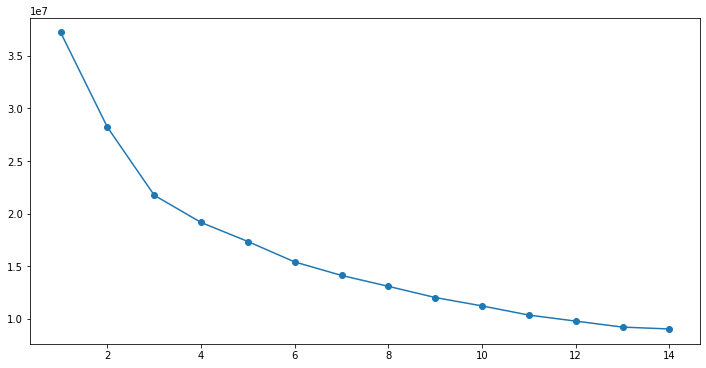

In [75]:
# Elbow plot to show maximum variations in number of clusters
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

1. The elbow plot shows that that there are likely 6 to 8 good clusters

2. Built model using 7 clusters

In [76]:
#Scaling the features using zscore
from scipy.stats import zscore
con_data_fill_z = con_data_fill.apply(zscore)
con_data_fill_z=pd.DataFrame(con_data_fill_z,columns=con_data_fill.columns)

# clustering using number of clusters = 7
cluster = KMeans( n_clusters = 7, random_state = Rand_seed )
cluster.fit(con_data_fill_z)

KMeans(n_clusters=7, random_state=60)

In [77]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(con_data_fill_z)
con_data_fill_z['GROUP'] = prediction     

# Creating a mirror copy for later re-use instead of building repeatedly
con_data_fill_z_copy = con_data_fill_z.copy(deep = True)

# show the centroids of clusters
centroids = cluster.cluster_centers_
centroids

array([[-0.82629931,  1.40365761, -0.84441166,  0.47086426, -0.66491054,
        -0.02812114, -0.13580283, -0.37538488, -0.63471811],
       [-0.40090088,  0.22179126,  1.08144879,  0.54840057,  0.52228811,
        -1.21515676, -0.37046945, -0.32327769, -0.21760497],
       [ 0.43180343, -0.84188862, -0.8361687 ,  0.40589266, -1.00834219,
         0.50439524,  0.3379073 , -0.40674964, -0.72370814],
       [ 1.03839713,  0.40102332, -0.4268974 , -0.99592187,  1.05054213,
        -0.79054752,  0.36524138, -0.15518748,  1.19825164],
       [-0.58817992, -0.62820919,  1.07890709, -0.64473573,  0.50353492,
         0.5990917 ,  0.41975188, -0.00845726, -0.12633329],
       [ 1.851728  , -0.32423015, -0.82122556, -0.208186  , -0.40664633,
         1.66583746, -1.79744783,  0.13797235,  1.15441612],
       [ 0.47406537, -0.04671482, -0.84359538,  1.48717624, -1.06133425,
        -0.25603148, -0.8760517 ,  2.10985525,  0.45590564]])

In [78]:
# show the centroids of clusters of each attributes
centroid_df = pd.DataFrame(centroids, columns = list(con_data) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.826299,1.403658,-0.844412,0.470864,-0.664911,-0.028121,-0.135803,-0.375385,-0.634718
1,-0.400901,0.221791,1.081449,0.548401,0.522288,-1.215157,-0.370469,-0.323278,-0.217605
2,0.431803,-0.841889,-0.836169,0.405893,-1.008342,0.504395,0.337907,-0.406750,-0.723708
3,1.038397,0.401023,-0.426897,-0.995922,1.050542,-0.790548,0.365241,-0.155187,1.198252
4,-0.588180,-0.628209,1.078907,-0.644736,0.503535,0.599092,0.419752,-0.008457,-0.126333
5,1.851728,-0.324230,-0.821226,-0.208186,-0.406646,1.665837,-1.797448,0.137972,1.154416
6,0.474065,-0.046715,-0.843595,1.487176,-1.061334,-0.256031,-0.876052,2.109855,0.455906


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187605E0608>,
      dtype=object)

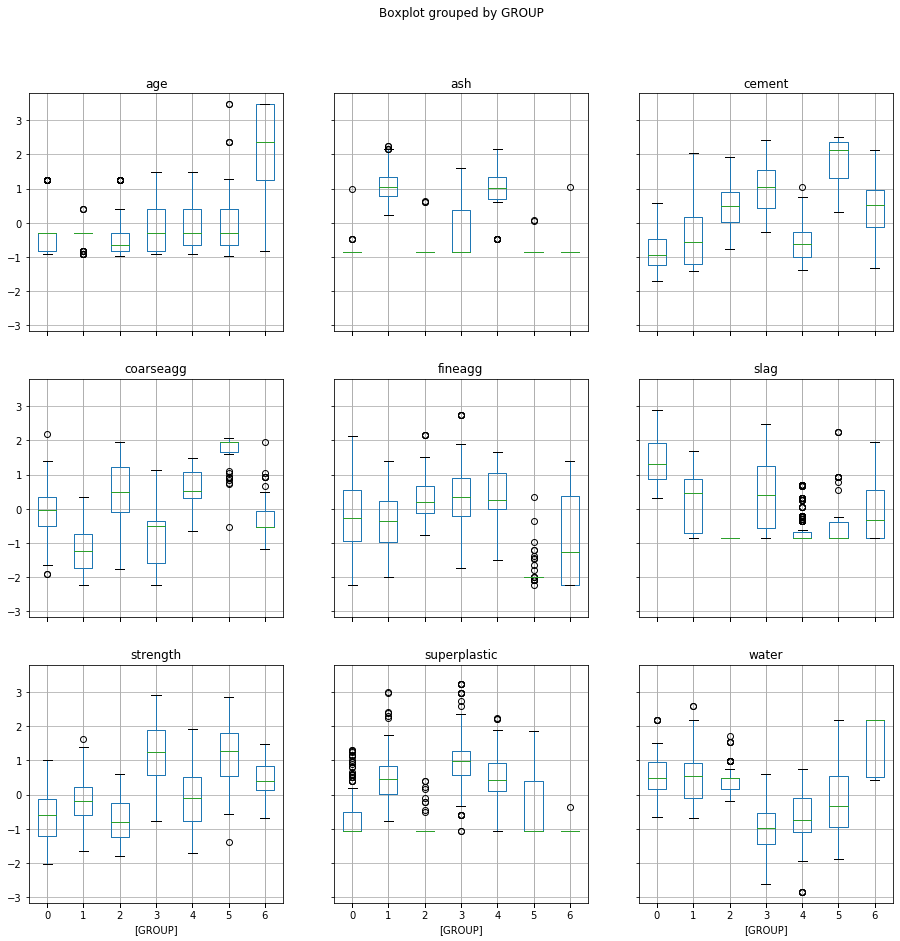

In [79]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
con_data_fill_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 15))

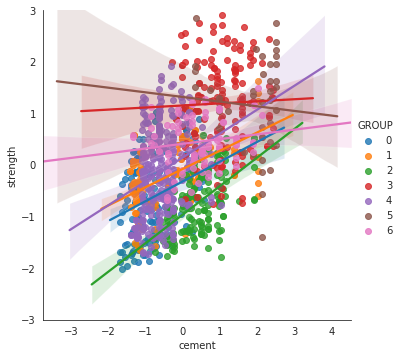

In [80]:
# 1. strength vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 4 of cement has the highest slope hence GROUP = 4 of cement is the best predictor of strength among all the groups of cement.

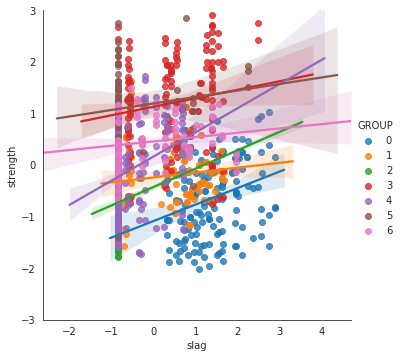

In [81]:
# 2. strength vs slag 
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 4 of slag has the highest slope hence GROUP = 4 of slag is the best predictor of strength among all the groups of slag.

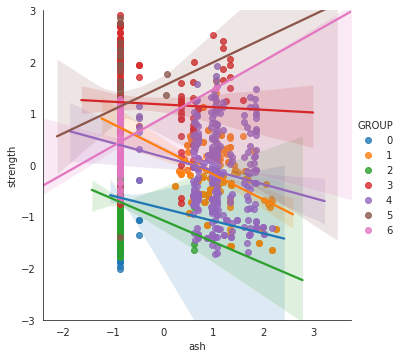

In [82]:
# 3. strength vs ash
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 6 of ash has the highest slope hence GROUP = 6 of ash is the best predictor of strength among all the groups of ash.

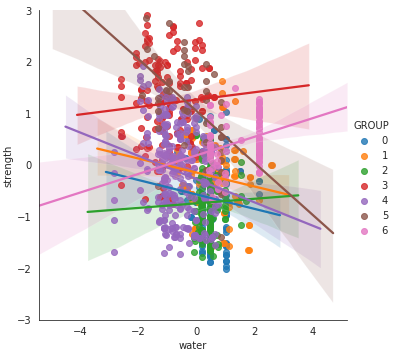

In [83]:
# 4. strength vs water 

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 5 of water has the highest negative slope hence GROUP = 5 of water is the best predictor of strength among all the groups of water.

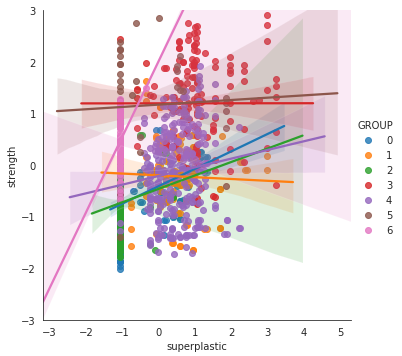

In [84]:
# 5. strength vs superplastic  

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 6 of superplastic has the highest slope hence GROUP = 6 of superplastic is the best predictor of strength among all the groups of superplastic.

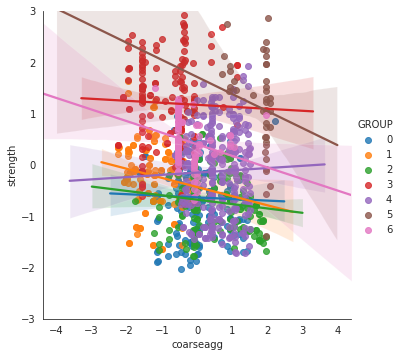

In [85]:
# 6. strength vs coarseagg 

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 5 of coarseagg has the highest negative slope hence GROUP = 5 of coarseagg is the best predictor of strength among all the groups of coarseagg.

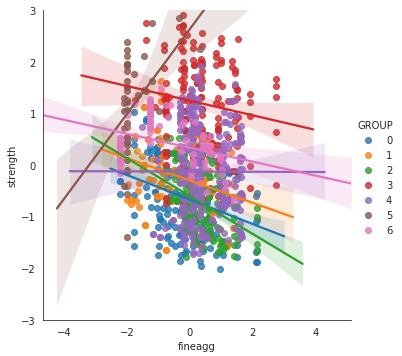

In [86]:
# 7. strength vs fineagg
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 5 of fineagg has the highest slope hence GROUP = 5 of fineagg is the best predictor of strength among all the groups of fineagg.

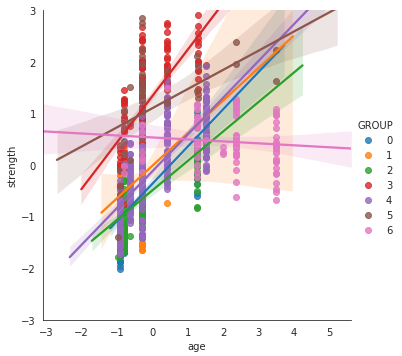

In [87]:
# 8. strength vs age

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=con_data_fill_z_copy,hue='GROUP')
plot.set(ylim = (-3,3))

From above it is seen that GROUP = 4 of age has the highest slope hence GROUP = 4 of age is the best predictor of strength among all the groups of age.

# 3. Deliverable -3 (create the model ) ( 15 marks)

## a. Obtain feature importance for the individual features and present your findings

### Built Decision tree on raw data:

In [88]:
from sklearn.tree import DecisionTreeRegressor
dt_model1 = DecisionTreeRegressor()
dt_model1.fit(X1_train_scaled , y1_train_scaled)
#printing the feature importance
ftr_imp1 = pd.DataFrame(dt_model1.feature_importances_,columns=['Imp'],index=X1_train.columns)
ftr_imp1.sort_values(["Imp"], axis=0, ascending=False, inplace=True) 
print('Feature importances of raw data: \n', ftr_imp1)

Feature importances of raw data: 
                    Imp
age           0.358360
cement        0.292638
water         0.121746
superplastic  0.078762
slag          0.055011
fineagg       0.044987
coarseagg     0.032359
ash           0.016137


From above it is seen that:

1. age, cement and water has feature importance comparatively more than rest of the faetures and hence these are more important features.

2. superplastic, slag, fineagg, coarseagg and ash are lesser important features. This analysis is also done in pairplot.

In [89]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y1_pred = dt_model1.predict(X1_test_scaled)
DTRaw_train_acc = dt_model1.score(X1_train_scaled,y1_train_scaled)
DTRaw_test_acc = dt_model1.score(X1_test_scaled,y1_test_scaled)
DTRaw_r2Score = metrics.r2_score(y1_test_scaled, y1_pred)
DTRaw_RMSE = math.sqrt(np.absolute(metrics.mean_squared_error(y1_test_scaled, y1_pred)))
DTRaw_MAE = metrics.mean_absolute_error(y1_test_scaled, y1_pred)
print('performance of decision tree on training set of raw data:', DTRaw_train_acc)
print('Performance of decision tree on testing set of raw data:', DTRaw_test_acc)
print('r2-score accuracy of decision tree on raw data:', DTRaw_r2Score)
print('RMSE of decision tree on raw data:', DTRaw_RMSE)
print('MAE of decision tree on raw data:', DTRaw_MAE)

performance of decision tree on training set of raw data: 0.995932074088639
Performance of decision tree on testing set of raw data: 0.800067204801534
r2-score accuracy of decision tree on raw data: 0.800067204801534
RMSE of decision tree on raw data: 0.46820624518605203
MAE of decision tree on raw data: 0.3126511563726999


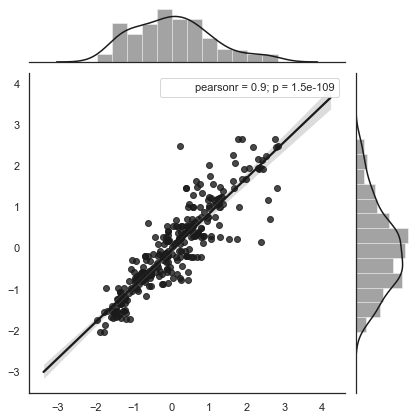

In [90]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=np.concatenate( y1_test_scaled, axis=0), y=y1_pred, stat_func=pearsonr,kind="reg", color="k");

### K fold cross validation of raw data

In [91]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=Rand_seed)
results1 = cross_val_score(dt_model1,X, y, cv=kfold)
DTRaw_kf_acc = np.mean(abs(results1))
DTRaw_kf_std = results1.std()
print('k-fold average accuracy of decision tree on raw data:', DTRaw_kf_acc)
print('k-fold standard Deviation of decision tree on raw data:', DTRaw_kf_std)

k-fold average accuracy of decision tree on raw data: 0.8523378048322667
k-fold standard Deviation of decision tree on raw data: 0.04427634176450663


### Drop 3 least important feature and built model

In [92]:
#independent and dependent variable
X_drop = con_data_fill.drop( ['fineagg', 'coarseagg', 'ash', 'strength'] , axis=1)
y_drop = con_data_fill[['strength']]

# Split X and y into training and test set in 70:30 ratio
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop,y_drop, test_size = 0.3, random_state = 1)
print("The dimension of training set of independent attribute is: {} and dependent attribute is: {}".format(X_drop_train.shape, y_drop_train.shape))
print("The dimension of testing set of independent attribute is: {} and dependent attribute is: {}".format(X_drop_test.shape, y_drop_test.shape))

The dimension of training set of independent attribute is: (703, 5) and dependent attribute is: (703, 1)
The dimension of testing set of independent attribute is: (302, 5) and dependent attribute is: (302, 1)


In [93]:
# Scaling the data before fitting

X_dropstand = StandardScaler().fit(X_drop_train)
X_drop_train_scaled = X_dropstand.transform(X_drop_train)
X_drop_test_scaled = X_dropstand.transform(X_drop_test)

y_dropstand = StandardScaler().fit(y_drop_train)
y_drop_train_scaled = y_dropstand.transform(y_drop_train)
y_drop_test_scaled = y_dropstand.transform(y_drop_test)

In [94]:
#Built decision tree model on highest significant data

dt_model_drop = DecisionTreeRegressor()
dt_model_drop.fit(X_drop_train_scaled , y_drop_train_scaled)
ftr_imp2 = pd.DataFrame(dt_model_drop.feature_importances_,columns=['Imp'],index=X_drop_train.columns)
ftr_imp2.sort_values(["Imp"], axis=0, ascending=False, inplace=True) 
print('Feature importances of data excluding least significant attributes: \n', ftr_imp2)

Feature importances of data excluding least significant attributes: 
                    Imp
cement        0.384818
age           0.325646
water         0.143820
slag          0.088545
superplastic  0.057172


In [95]:
y_drop_pred = dt_model_drop.predict(X_drop_test_scaled)

DTdrop_train_acc = dt_model_drop.score(X_drop_train_scaled,y_drop_train_scaled)
DTdrop_test_acc = dt_model_drop.score(X_drop_test_scaled,y_drop_test_scaled)
DTdrop_r2Score = metrics.r2_score(y_drop_test_scaled, y_drop_pred)
DTdrop_RMSE = math.sqrt(np.absolute(metrics.mean_squared_error(y_drop_test_scaled, y_drop_pred)))
DTdrop_MAE = metrics.mean_absolute_error(y_drop_test_scaled, y_drop_pred)
print('performance of decision tree on training set of dropped data:', DTdrop_train_acc)
print('Performance of decision tree on testing set of dropped data:', DTdrop_test_acc)
print('r2-score accuracy of decision tree on dropped data:', DTdrop_r2Score)
print('RMSE of decision tree on dropped data:', DTdrop_RMSE)
print('MAE of decision tree on dropped data:', DTdrop_MAE)

performance of decision tree on training set of dropped data: 0.9950270902308589
Performance of decision tree on testing set of dropped data: 0.7538060068767944
r2-score accuracy of decision tree on dropped data: 0.7538060068767944
RMSE of decision tree on dropped data: 0.45366187474418757
MAE of decision tree on dropped data: 0.3183585988136777


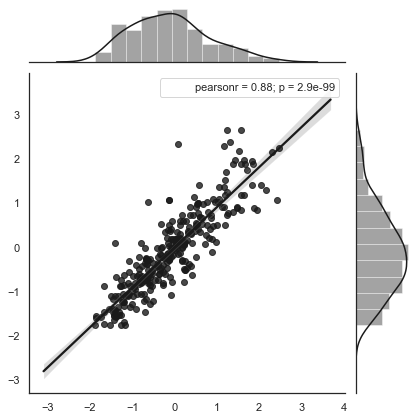

In [96]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=np.concatenate(y_drop_test_scaled, axis=0), y=y_drop_pred, stat_func=pearsonr,kind="reg", color="k");

### K fold cross validation of dropped data

In [97]:
results2 = cross_val_score(dt_model_drop,X_drop, y_drop, cv=kfold)
DTdrop_kf_acc = np.mean(abs(results2))
DTdrop_kf_std = results2.std()
print('k-fold average accuracy of decision tree on dropped data:', DTdrop_kf_acc)
print('k-fold standard Deviation of decision tree on dropped data:', DTdrop_kf_std)

k-fold average accuracy of decision tree on dropped data: 0.8416466339937637
k-fold standard Deviation of decision tree on dropped data: 0.044078651388770825


### Comparison of accuracy and score of decision tree

In [98]:
# initialise data of lists. 
data = {'train_(70:30)_acc':[DTRaw_train_acc, DTdrop_train_acc],\
        'test_(70:30)_acc':[DTRaw_test_acc, DTdrop_test_acc],\
        'r2_score':[DTRaw_r2Score, DTdrop_r2Score],\
        'RMSE':[DTRaw_RMSE, DTdrop_RMSE],\
        'MAE':[DTRaw_MAE, DTdrop_MAE],\
        'kfold_avg':[DTRaw_kf_acc, DTdrop_kf_acc],\
        'kfold_std':[DTRaw_kf_std, DTdrop_kf_std]} 
  
# Creates comparison table using pandas DataFrame. 
compare_table_DT = pd.DataFrame(data, index =['DT_Raw_data', 'DT_Dropped_data']) 
  
# print the comparison table 
compare_table_DT 

,train_(70:30)_acc,test_(70:30)_acc,r2_score,RMSE,MAE,kfold_avg,kfold_std
DT_Raw_data,0.995932,0.800067,0.800067,0.468206,0.312651,0.852338,0.044276
DT_Dropped_data,0.995027,0.753806,0.753806,0.453662,0.318359,0.841647,0.044079


From above it is seen that:

1. Both the decision trees on raw data and on data considering most significant attributes are overfitting in which DT on significant attribute data gives even worse result in test data, it occurs as we dropped few features.

2. DT on raw data gives better result in terms of error than DT on significant attribute data.

3. The average k-fold ccuracy of DT on raw data is more than DT on significant attribute data which is evident as it has lesser error.

4. Deviation in accuracy of DT on raw data is lesser than DT on significant attribute data 

# 4. Deliverable -4 (Tuning the model) (20 marks)

## a. Algorithms that you think will be suitable for this project (5 marks)

### Create a function to call all the algorithms which are suitable to check r2-score and RMSE

In [99]:
Model = []
r2_score = []
RMSE = []

def r2_score_RMSE(name, model, x, y):
    Model.append(name)
    r2_score.append(model_selection.cross_val_score(model, x, y, cv=kfold_CV, scoring='r2').mean())
    RMSE.append(math.sqrt(np.absolute(model_selection.cross_val_score(model, x, y, cv=kfold_CV, scoring='neg_mean_squared_error').mean())))

In [100]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regressor', 'Support vector Regressor', 'K Neighbors Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Adaboost Regressor', 'Bagging Regressor']
         
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(),SVR(), KNeighborsRegressor(), RandomForestRegressor(),GradientBoostingRegressor(), AdaBoostRegressor(), BaggingRegressor()]
          

#Running all algorithms
for name, model in zip(names, models):
    r2_score_RMSE(name, model, X1_train_scaled, y1_train_scaled)

In [101]:
model_score_acc = pd.DataFrame({'Model Name': Model, 'r2-score': r2_score, 'RMSE': RMSE})
print("The model r2-score and RMSE are as follows:")
model_score_acc

The model r2-score and RMSE are as follows:


,Model Name,r2-score,RMSE
0,Linear Regression,0.660483,0.575154
1,Ridge Regression,0.660601,0.575073
2,Lasso Regression,-0.024323,1.001837
3,Decision Tree Regressor,0.766686,0.478590
4,Support vector Regressor,0.828167,0.408048
5,K Neighbors Regressor,0.694140,0.551536
6,Random Forest Regressor,0.871354,0.355483
7,Gradient Boosting Regressor,0.884646,0.335323
8,Adaboost Regressor,0.748385,0.485043
9,Bagging Regressor,0.855224,0.374854


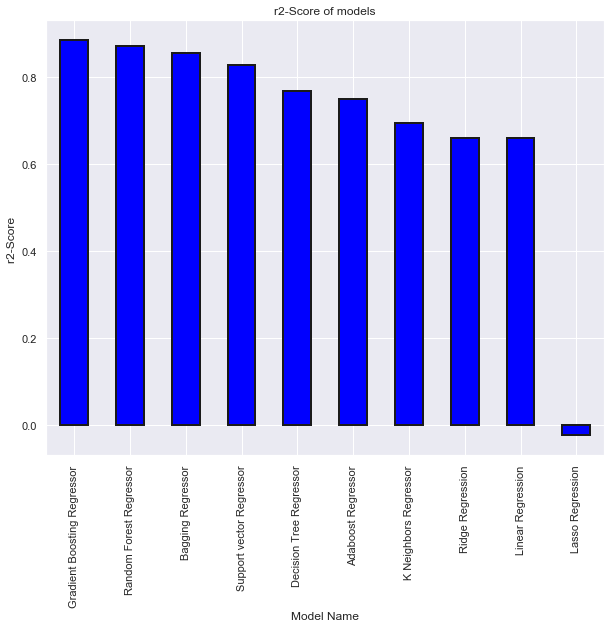

In [102]:
model_score_acc=model_score_acc.sort_values(by='r2-score',ascending=False)
model_score_acc.set_index('Model Name', inplace = True) # Setting the index as model
model_score_acc['r2-score'].plot.bar(color = 'blue', figsize = (10, 8), edgecolor = 'k', linewidth = 2)
plt.title('r2-Score of models');
plt.ylabel('r2-Score ');
model_score_acc.reset_index(inplace = True) # Again resetting the index

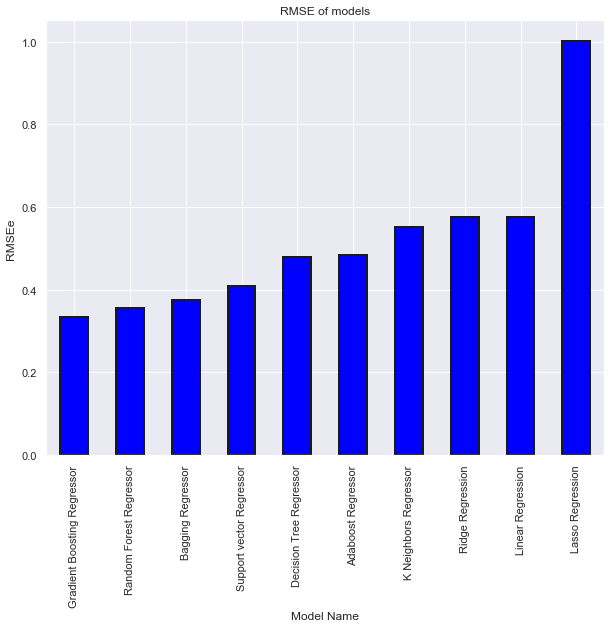

In [103]:
model_score_acc=model_score_acc.sort_values(by='RMSE',ascending=True)
model_score_acc.set_index('Model Name', inplace = True) # Setting the index as model
model_score_acc['RMSE'].plot.bar(color = 'blue', figsize = (10, 8), edgecolor = 'k', linewidth = 2)
plt.title('RMSE of models');
plt.ylabel('RMSEe ');
model_score_acc.reset_index(inplace = True) # Again resetting the index

From above it is seen that Gradient Boosting Regressor is the best model for this project having highest r2-score of 0.884714 and least RMSE of 0.335167 whereas Lasso Ressor is the worst algorithm for this project.

## b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)

From above it is seen that Gradient Boosting Regressor is the best model, its performance can be increased by tuning its hyperparameter without making it overfit or underfit  

### Hyperparameter tuning of Gradient Boosting Regressor using grid search

In [104]:
GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
param_grid_grad = {'n_estimators':[100, 150, 200, 250],
                   'max_depth':[10, 20, 30], 
                   'min_samples_split':[100], 
                   'learning_rate':[0.1, 0.2]}

In [105]:
grid_grad = GridSearchCV(GradientBoostingRegressor(random_state=Rand_seed), 
                        param_grid = param_grid_grad, scoring='r2', 
                        cv=kfold_CV).fit(X1_train_scaled, y1_train_scaled)

In [106]:
print(" Best parameters of tuned gradient boosting regressor is: \n", grid_grad.best_params_) 
print(" Best cross-validation accuracy of tuned gradient boosting regressor is: {:.4f}". format( grid_grad.best_score_)) 
print(" Test set accuracy of tuned gradient boosting regressor is: {:.4f}". format( grid_grad.score( X1_test_scaled, y1_test_scaled)))

 Best parameters of tuned gradient boosting regressor is: 
 {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 250}
 Best cross-validation accuracy of tuned gradient boosting regressor is: 0.9113
 Test set accuracy of tuned gradient boosting regressor is: 0.9266


## c. Model performance range at 95% confidence level (10 marks)  

In [107]:
results = grid_grad.cv_results_['mean_test_score']
print("The grid search model score is: \n", results.sort())
print("The average accuracy is: {:.4f}" .format(results.mean()))
print("The deviation in accuracy is: {:.4f}" .format(results.std()))

The grid search model score is: 
 None
The average accuracy is: 0.9077
The deviation in accuracy is: 0.0021


In [108]:
from scipy import stats
from sklearn.utils import resample

values = con_data_fill.values
con_data_z = con_data_fill.apply(zscore)
con_data_z = pd.DataFrame(con_data_z,columns = con_data_fill.columns)

n_iterations = 500 # Number bootstrap samples to create       
n_size = int(len(con_data_z) * 1)  # size of a bootstrap sample  

# creting list to hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
        
     # fit best tuned gradient boost model found above
    grad_tree = GradientBoostingRegressor(random_state=Rand_seed, max_depth=10, 
                                min_samples_split=100, n_estimators=250, 
                                learning_rate=0.1)
    # fit the modelon traininf set
    grad_tree.fit(train[:,:-1], train[:,-1]) 
    
    # Take the target column (strength) for all rows in test set
    y_test = test[:,-1]    
    
    # evaluate model
    # predict based on independent variables in the test data
    score = grad_tree.score(test[:, :-1] , y_test)
    predictions = grad_tree.predict(test[:, :-1])  

    stats.append(score)

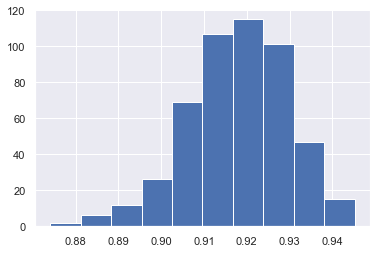

In [109]:
# visualization of scores using histogram
from matplotlib import pyplot

pyplot.hist(stats)
pyplot.show()

In [110]:
conf_level = 0.95  # Given to find at 95% confidence level
tail = ((1.0-conf_level)/2.0) * 100  # tail on both upper and lower region
lower = max(0.0, np.percentile(stats, tail))  
up_tail = (conf_level+((1.0-conf_level)/2.0)) * 100
upper = min(1.0, np.percentile(stats, up_tail))
print(' The performance at %.1f confidence interval ranges from %.1f%% to %.1f%%' % (conf_level*100, lower*100, upper*100))

 The performance at 95.0 confidence interval ranges from 89.1% to 93.9%
